In [9]:
import os
import re 
import random
import string      # for string operations    
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/akshays/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#pip install gdown

Note: you may need to restart the kernel to use updated packages.


# Sentiment analysis- Twiter(tweets)

In [13]:
!gdown 11LWo5nagSmC72hOJM9lm2l05sdQxt4rf

Downloading...
From: https://drive.google.com/uc?id=11LWo5nagSmC72hOJM9lm2l05sdQxt4rf
To: /Users/akshays/Documents/Personal Projects/NLP practivce/NLP_practice/corona_tweets.csv
100%|██████████████████████████████████████| 1.00M/1.00M [00:00<00:00, 3.22MB/s]


In [14]:
df = pd.read_csv('corona_tweets.csv')

In [15]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [17]:
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,3798.000000,3798.000000,2964,3798,3798,3798
unique,NaN,NaN,1717,15,3798,5
top,NaN,NaN,United States,13-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative
freq,NaN,NaN,75,1233,1,1041
mean,1899.500000,46851.500000,NaN,NaN,NaN,NaN
std,1096.532489,1096.532489,NaN,NaN,NaN,NaN
min,1.000000,44953.000000,NaN,NaN,NaN,NaN
25%,950.250000,45902.250000,NaN,NaN,NaN,NaN
50%,1899.500000,46851.500000,NaN,NaN,NaN,NaN
75%,2848.750000,47800.750000,NaN,NaN,NaN,NaN


In [21]:
df['Sentiment'] = df['Sentiment'].replace('Extremely Positive','Positive' )
df['Sentiment'] = df['Sentiment'].replace('Extremely Negative','Negative' )

In [23]:
df['Sentiment'].value_countsnts()

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64

In [25]:
# Separating positive_tweets and negative_tweets
all_positive_tweets = list(df[df['Sentiment'] == 'Positive']['OriginalTweet'].astype(str)) # Making equal positive and negative tweet counts
all_negative_tweets = list(df[df['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]

# Splitting training and testing set. 80/20 split
positive_train, positive_test = train_test_split(all_positive_tweets, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size=0.2, random_state=42)

print("Size of training dataset: ",len(positive_train) + len(negative_train))
print("Size of testing dataset: ", len(positive_test)  + len(negative_test))

# print positive in green
print('\033[92m' + '\npositive in green: ')
print('\033[92m' + all_positive_tweets[random.randint(0,947)])
print('\033[91m' + '\nnegative in red: ')
# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,947)])

Size of training dataset:  1993
Size of testing dataset:  500

positive in green: 
Coming back from the grocery store like... #CoronavirusPandemic #Covid_19 #lockdown https://t.co/9AW8hDr8Mo

negative in red: 


#ahg #finance x #financeservices #coronavirus #oilvscoronavirus #gulfcountires #economy #globaleffect https://t.co/cU77CasWG3


# Tokenization

In [27]:
# Split on spaces
tweet = all_positive_tweets[43] 
word = tweet.split() # space tokenizer
print('Using Split :',word)

Using Split : ['We', '(@hamiltonpoverty)', 'are', 'calling', 'on', 'Canadian', 'Federal', 'Government', '??', 'to', 'provide', '#BasicIncome', "'Well-being", 'and', 'Stimulus', "Payments'", 'during', 'current', 'COVID-19', 'situation.', 'A', 'basic', 'income', '(even', 'interim)', 'could', 'help', 'keep', 'people', 'healthy,', 'then', 'revive', 'consumer', 'confidence', 'and', 'spending.', '#CdnPoli', 'https://t.co/wRmkWLhJku']


### Python already has modules for collecting, handling, and processing text data.


> **Using Natural Language Toolkit (NLTK) package.**

In [28]:
from nltk.tokenize import word_tokenize

words = word_tokenize(tweet)
print('Using NLTK :',words)

Using NLTK : ['We', '(', '@', 'hamiltonpoverty', ')', 'are', 'calling', 'on', 'Canadian', 'Federal', 'Government', '?', '?', 'to', 'provide', '#', 'BasicIncome', "'Well-being", 'and', 'Stimulus', 'Payments', "'", 'during', 'current', 'COVID-19', 'situation', '.', 'A', 'basic', 'income', '(', 'even', 'interim', ')', 'could', 'help', 'keep', 'people', 'healthy', ',', 'then', 'revive', 'consumer', 'confidence', 'and', 'spending', '.', '#', 'CdnPoli', 'https', ':', '//t.co/wRmkWLhJku']


In [29]:
# Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer

In [30]:
tweet = all_positive_tweets[43] 
tweet

"We (@hamiltonpoverty) are calling on Canadian Federal Government ?? to provide #BasicIncome 'Well-being and Stimulus Payments' during current COVID-19 situation. A basic income (even interim) could help keep people healthy, then revive consumer confidence and spending. #CdnPoli https://t.co/wRmkWLhJku"

In [31]:
# Removing hyperlinks and hashtags

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

We (@hamiltonpoverty) are calling on Canadian Federal Government ?? to provide #BasicIncome 'Well-being and Stimulus Payments' during current COVID-19 situation. A basic income (even interim) could help keep people healthy, then revive consumer confidence and spending. #CdnPoli https://t.co/wRmkWLhJku

We (@hamiltonpoverty) are calling on Canadian Federal Government ?? to provide BasicIncome 'Well-being and Stimulus Payments' during current COVID-19 situation. A basic income (even interim) could help keep people healthy, then revive consumer confidence and spending. CdnPoli 


In [32]:
# Tokenizing

print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


We (@hamiltonpoverty) are calling on Canadian Federal Government ?? to provide BasicIncome 'Well-being and Stimulus Payments' during current COVID-19 situation. A basic income (even interim) could help keep people healthy, then revive consumer confidence and spending. CdnPoli 


Tokenized string:
['we', '(', ')', 'are', 'calling', 'on', 'canadian', 'federal', 'government', '?', '?', 'to', 'provide', 'basicincome', "'", 'well-being', 'and', 'stimulus', 'payments', "'", 'during', 'current', 'covid', '-', '19', 'situation', '.', 'a', 'basic', 'income', '(', 'even', 'interim', ')', 'could', 'help', 'keep', 'people', 'healthy', ',', 'then', 'revive', 'consumer', 'confidence', 'and', 'spending', '.', 'cdnpoli']


In [33]:
# Import the english stop words list from NLTK
nltk.download("stopwords")
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshays/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['we', '(', ')', 'are', 'calling', 'on', 'canadian', 'federal', 'government', '?', '?', 'to', 'provide', 'basicincome', "'", 'well-being', 'and', 'stimulus', 'payments', "'", 'during', 'current', 'covid', '-', '19', 'situation', '.', 'a', 'basic', 'income', '(', 'even', 'interim', ')', 'could', 'help', 'keep', 'people', 'healthy', ',', 'then', 'revive', 'consumer', 'confidence', 'and', 'spending', '.', 'cdnpoli']

removed stop words and punctuation:
['calling', 'canadian', 'federal', 'government', 'provide', 'basicincome', 'well-being', 'stimulus', 'payments', 'current', 'covid', '19', 'situation', 'basic', 'income', 'even', 'interim', 'could', 'help', 'keep', 'people', 'healthy', 'revive', 'consumer', 'confidence', 'spending', 'cdnpoli']


In [35]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['calling', 'canadian', 'federal', 'government', 'provide', 'basicincome', 'well-being', 'stimulus', 'payments', 'current', 'covid', '19', 'situation', 'basic', 'income', 'even', 'interim', 'could', 'help', 'keep', 'people', 'healthy', 'revive', 'consumer', 'confidence', 'spending', 'cdnpoli']

stemmed words:
['call', 'canadian', 'feder', 'govern', 'provid', 'basicincom', 'well-b', 'stimulu', 'payment', 'current', 'covid', '19', 'situat', 'basic', 'incom', 'even', 'interim', 'could', 'help', 'keep', 'peopl', 'healthi', 'reviv', 'consum', 'confid', 'spend', 'cdnpoli']


In [36]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [38]:
# choose the same tweet
tweet = all_positive_tweets[43] 

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



We (@hamiltonpoverty) are calling on Canadian Federal Government ?? to provide #BasicIncome 'Well-being and Stimulus Payments' during current COVID-19 situation. A basic income (even interim) could help keep people healthy, then revive consumer confidence and spending. #CdnPoli https://t.co/wRmkWLhJku

preprocessed tweet:
['call', 'canadian', 'feder', 'govern', 'provid', 'basicincom', 'well-b', 'stimulu', 'payment', 'current', 'covid', '19', 'situat', 'basic', 'incom', 'even', 'interim', 'could', 'help', 'keep', 'peopl', 'healthi', 'reviv', 'consum', 'confid', 'spend', 'cdnpoli']


# BOW/ Count BOWs
Now we can build a BOWs/ Count BOWs, in which we will create matrix of 1s and 0s by using our vocabulary for each tweet!--- check for dimensionality and sparseness of the vector

In [42]:
def build_freqs(tweets, ys):
    """
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
        freqs: a dictionary mapping each (word, sentiment) pair (=key) to its frequency (=value)
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [40]:
training_tweets = positive_train + negative_train
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(positive_train))), np.zeros((len(negative_train))))

In [43]:
# create frequency dictionary
freqs = build_freqs(training_tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 8007


In [44]:
# select some words to appear in the report.
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['void', 1, 0],
 ['commun', 31, 9],
 ['spirit', 2, 1],
 ['stop', 22, 36],
 ['merri', 0, 0],
 ['nice', 15, 4],
 ['good', 96, 25],
 ['bad', 3, 16],
 ['sad', 0, 7],
 ['mad', 4, 10],
 ['best', 35, 3],
 ['pretti', 12, 1],
 [':)', 4, 1],
 [':(', 3, 0],
 ['song', 2, 0],
 ['idea', 11, 6],
 ['power', 11, 1],
 ['play', 17, 1]]

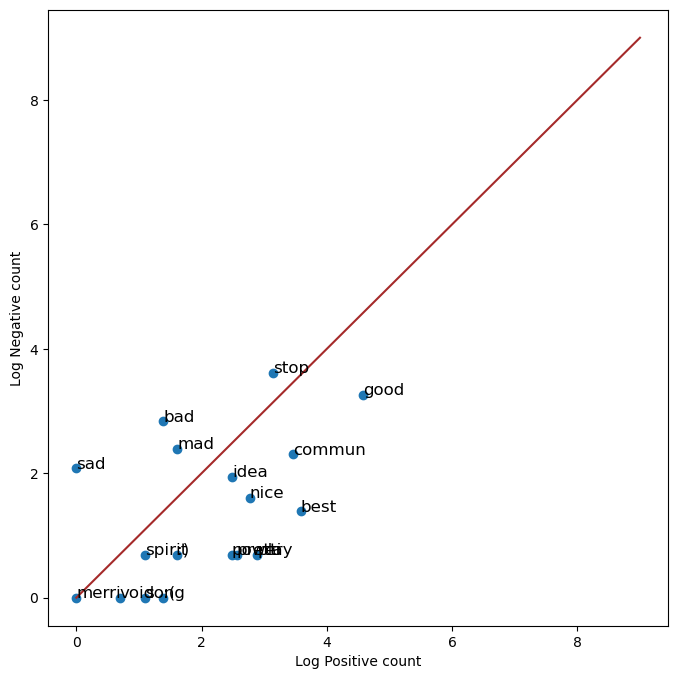

In [45]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'brown') # Plot the red line that divides the 2 areas.
plt.show()

In [46]:
def extract_features(tweet, freqs):
    '''
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
        
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    assert(x.shape == (1, 3))
    return x

# Extract feature for a tweet

In [47]:
train_x = training_tweets
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 2.418e+03 1.642e+03]]


In [48]:
tmp2 = extract_features('This batch is the best batch', freqs)
print(tmp2)

[[ 1. 39.  3.]]


In [49]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y,order='C')

# Most basic- Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.703963873557451


In [51]:
# Testing
testing_tweets = positive_test + negative_test

test_X = np.zeros((len(testing_tweets), 3))
for i in range(len(testing_tweets)):
    test_X[i, :]= extract_features(testing_tweets[i], freqs)

# training labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_Y = np.ravel(test_y,order='C')

print("Testing Accuracy: ",clf.score(test_X, test_Y))

Testing Accuracy:  0.648


In [52]:
def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)
    return y_pred

# test your function
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over', 
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding', 
                  '\033[92m'+'Government efforts are great.', 
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus', 
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 1.000000
This is seriously ridiculous. Stop hoarding -> 1.000000
Government efforts are great. -> 1.000000
Nonsense -> 1.000000
Panic-buying is pushing up prices.#coronavirus -> 1.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000
